In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
pd.set_option('display.max_columns', None)

# Files imports

## Df counts and df Density

In [6]:
from slcities.get_data import DataMerger

In [25]:
places = pd.read_csv(
    '/home/djampa/code/data_project_lewagon/slcities/slcities/data/places.csv')
areas = pd.read_csv(
    '/home/djampa/code/data_project_lewagon/slcities/slcities/data/areas.csv')
lights = pd.read_csv(
    '/home/djampa/code/data_project_lewagon/slcities/slcities/data/lights.csv')
sensors = pd.read_csv(
    '/home/djampa/code/data_project_lewagon/slcities/slcities/data/sensors.csv'
)
dm = DataMerger()
dm.count_places(places, place_col='type')
dm.count_pop(areas)
dm.count_light(lights)
dm.count_sensors(sensors)
dm.merge_df(areas)
global_cnt_df = dm.get_count_df()
global_density_df = dm.get_density_df()
dir_path = ''
global_cnt_df.to_csv(os.path.join(dir_path, 'global_cnt_df.csv'), index=False)
global_density_df.to_csv(os.path.join(dir_path, 'global_density_df.csv'), index=False)

In [8]:
global_cnt_df.head()

,ED_ID,Shape__Area,geometry,art_gallery,atm,bakery,bank,bar,beauty_salon,bus_station,cafe,car_dealer,car_rental,car_repair,car_wash,clothing_store,convenience_store,department_store,doctor,drugstore,electrician,electronics_store,food,furniture_store,gas_station,grocery_or_supermarket,gym,hair_care,hardware_store,health,home_goods_store,hospital,jewelry_store,laundry,liquor_store,local_government_office,lodging,movie_theater,museum,night_club,park,parking,pharmacy,plumber,police,post_office,primary_school,real_estate_agency,restaurant,school,shopping_mall,spa,stadium,store,supermarket,pop,light,sensors
0,267070,9.623428e+05,"POLYGON ((-6.14618511748835 53.2834901197572, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2225,0.0,0.0
1,267090,2.690560e+06,"POLYGON ((-6.18040707514243 53.276069737954, -...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445,0.0,0.0
2,268025,8.953063e+05,"POLYGON ((-6.22254299821012 53.3805329261947, ...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2051,158.0,0.0
3,267158,6.936444e+07,"POLYGON ((-6.34697087423879 53.453601843932, -...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9602,0.0,0.0
4,267023,1.399951e+06,"POLYGON ((-6.16683245771262 53.2905069047941, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2316,0.0,0.0


## Transform into geopandas 

In [9]:
from slcities.utils import format_df_to_geopandas

In [10]:
gpd_global_cnt = format_df_to_geopandas(global_cnt_df)
gpd_global_density = format_df_to_geopandas(global_density_df)

In [11]:
gpd_global_cnt.head(2)

,ED_ID,Shape__Area,geometry,art_gallery,atm,bakery,bank,bar,beauty_salon,bus_station,cafe,car_dealer,car_rental,car_repair,car_wash,clothing_store,convenience_store,department_store,doctor,drugstore,electrician,electronics_store,food,furniture_store,gas_station,grocery_or_supermarket,gym,hair_care,hardware_store,health,home_goods_store,hospital,jewelry_store,laundry,liquor_store,local_government_office,lodging,movie_theater,museum,night_club,park,parking,pharmacy,plumber,police,post_office,primary_school,real_estate_agency,restaurant,school,shopping_mall,spa,stadium,store,supermarket,pop,light,sensors
0,267070,9.623428e+05,"POLYGON ((-6.14619 53.28349, -6.14810 53.28267...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2225,0.0,0.0
1,267090,2.690560e+06,"POLYGON ((-6.18041 53.27607, -6.17807 53.27493...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445,0.0,0.0


## Get places counts per polygons

In [12]:
lst_cols_to_discard = ['ED_ID', 'Shape__Area', 'geometry',
                       'pop', 'light', 'sensors']
                       
lst_cols_places = [x for x in gpd_global_cnt.columns if x not in lst_cols_to_discard]
gpd_global_cnt['total_places'] = gpd_global_cnt[lst_cols_places].sum(axis=1)

In [13]:
gpd_global_cnt.head(2)

,ED_ID,Shape__Area,geometry,art_gallery,atm,bakery,bank,bar,beauty_salon,bus_station,cafe,car_dealer,car_rental,car_repair,car_wash,clothing_store,convenience_store,department_store,doctor,drugstore,electrician,electronics_store,food,furniture_store,gas_station,grocery_or_supermarket,gym,hair_care,hardware_store,health,home_goods_store,hospital,jewelry_store,laundry,liquor_store,local_government_office,lodging,movie_theater,museum,night_club,park,parking,pharmacy,plumber,police,post_office,primary_school,real_estate_agency,restaurant,school,shopping_mall,spa,stadium,store,supermarket,pop,light,sensors,total_places
0,267070,9.623428e+05,"POLYGON ((-6.14619 53.28349, -6.14810 53.28267...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2225,0.0,0.0,0.0
1,267090,2.690560e+06,"POLYGON ((-6.18041 53.27607, -6.17807 53.27493...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445,0.0,0.0,0.0


# Mapping

In [31]:
from slcities.params import DUBLIN_CENTER_COORDS
from slcities.utils import dataframe_to_geopandas
from folium.plugins import HeatMap

## DATA layers (what we used to do our clustering)

In [27]:
places['coordinates'] = list(zip(places['latitude'], places['longitude']))

In [28]:
places.head(3)

,Unnamed: 0,place_id,latitude,longitude,type,geometry,ED_ID,coordinates
0,0,ChIJEz-hVowOZ0gRUzIA23OzlnI,53.349314,-6.244549,doctor,POINT (-6.244549 53.349314),268109,"(53.349314, -6.244549)"
1,1,ChIJV45VmXQPZ0gRGi62tS-6fzQ,53.349484,-6.244851,doctor,POINT (-6.244851199999999 53.34948410000001),268109,"(53.34948410000001, -6.244851199999999)"
2,2,ChIJoVtd7jYPZ0gRIpq6MOiqTmg,53.349517,-6.245639,doctor,POINT (-6.245638699999999 53.34951659999999),268109,"(53.34951659999999, -6.245638699999999)"


In [54]:
color_dict = {'bar':'red', 'restaurant':'blue', 'atm':'green', 'lodging':'black'}

In [56]:
places['color'] = 'yellow'

In [61]:
places['color'] = places['type'].map(color_dict)
places['color'] = places['color'].fillna('yellow')
places.color.value_counts()

yellow    6370
blue       811
black      557
red        194
green      153
Name: color, dtype: int64

In [18]:
lat_center, lon_center = DUBLIN_CENTER_COORDS

In [72]:
finalmap = folium.Map(location=[lat_center, lon_center],
                zoom_start=10,
                min_zoom=8,
                tiles= None,
                control_scale=True,
                attr='SL Cities Project')


dublin_layer = folium.TileLayer(tiles= 'CartoDB dark_matter',
                 control_scale = True,
                 overlay = False,
                 name = 'Dublin')

density_layer = folium.Choropleth(geo_data = gpd_global_density,
                                name="density",
                                data=gpd_global_density,
                                columns=["ED_ID", "pop"],
                                key_on="feature.properties.ED_ID",
                                fill_color="OrRd",
                                fill_opacity=0.4,
                                line_opacity=0.8,
                                legend_name="Pop density (%)",
                                threshold_scale=8,
                                highlight=True)



tooltip = folium.features.GeoJsonTooltip(fields = ['pop',
                                                   'ED_ID'],
                                        aliases = ['Densité de population par m² : ',
                                                   'Quartier : '])



density_layer.geojson.add_child(tooltip)




places_cluster = MarkerCluster(name='Places',
                               control=True,
                               options={'maxZoom':8,
                                        'minZoom': 20,
                                        'maxClusterRadius':40,
                                        'disableClusteringAtZoom': 12
                                       })


for k in range(len(places)):
    folium.CircleMarker(location=[places['latitude'][k], places['longitude'][k]],
                        radius = 5, 
                        popup = "("+str(places['type'][k])+") ", 
                        fill_color = places['color'][k], 
                        color = "gray",
                        weight = 0.5,
                        fill_opacity = 0.9
                       ).add_to(places_cluster)


# hm = HeatMap(
#     data=places.coordinates,
#     radius=10)




# marker_cluster = MarkerCluster(name='Light',
#                                options={'maxZoom':2,
#                                         'minZoom': 20,
#                                         'maxClusterRadius':80,
#                                         'disableClusteringAtZoom': 11
#                                        })

# for k in range(len(df_lights)):
#     folium.CircleMarker(location=[df_lights['latitude'][k], df_lights['longitude'][k]],
#                         radius = 0.5, 
#                         popup = "("+str('Street Light')+") ", 
#                         fill_color = 'yellow', 
#                         color = "gray",
#                         weight = 0.5,
#                         fill_opacity = 0.9
#                        ).add_to(marker_cluster)


dublin_layer.add_to(finalmap)
# hm.add_to(finalmap)
density_layer.add_to(finalmap)

places_cluster.add_to(finalmap)

# marker_cluster.add_to(finalmap)


folium.LayerControl().add_to(finalmap);

### Clustering layer

### Lights

## Lighting models

### Defining the models

In [75]:
from slcities.daylight_api_call import DaylightInfos

In [77]:
# d = DaylightInfos()
# daylight_df = d.get_daylight_infos()

In [81]:
# daylight_df.to_csv('/home/djampa/code/data_project_lewagon/slcities/slcities/data/daylight.txt')

In [84]:
from slcities.lights_models import night_length

In [86]:
daylight_df = pd.read_csv('/home/djampa/code/data_project_lewagon/slcities/slcities/data/daylight.txt')

In [87]:
daylight_df.head(2)

,Unnamed: 0,sunrise,sunset,solar_noon,day_length,civil_twilight_begin,civil_twilight_end,nautical_twilight_begin,nautical_twilight_end,astronomical_twilight_begin,astronomical_twilight_end
0,0,8:37:54 AM,4:19:35 PM,12:28:45 PM,07:41:41,7:57:51 AM,4:59:38 PM,7:12:47 AM,5:44:42 PM,6:30:22 AM,6:27:08 PM
1,1,8:37:42 AM,4:20:44 PM,12:29:13 PM,07:43:02,7:57:44 AM,5:00:41 PM,7:12:44 AM,5:45:42 PM,6:30:21 AM,6:28:05 PM


In [90]:
conso_df = pd.DataFrame()
conso_df['night_length'] = daylight_df['day_length'].apply(night_length)

In [95]:
SON_avg_power_per_unit = 150/3600/1000 # kW/h : light age >= 15 years
LED_avg_power_per_unit = 50/3600/1000 # kW/h :recent lights
## diff of flux efficiency (candela qty) between sodium and led 
SON_efficiency = 0.9
LED_efficiency = 1

SON_flux_efficiency = 0.9 # ~10% of the flux goes to the sky
LED_flux_efficiency = 0.99 # ~ < 1% du flux vers le ciel
tarif_elec = 0.1336 #avg price / kWh (France, 2021, euro)

In [96]:
conso_df['SON_kwh'] = conso_df['night_length']*SON_avg_power_per_unit # SON conso / day
conso_df['LED_kwh'] = conso_df['night_length']*LED_avg_power_per_unit # LED conso / day

In [97]:
conso_df.head()

,night_length,SON_kwh,LED_kwh
0,58699,2.445792,0.815264
1,58618,2.442417,0.814139
2,58531,2.438792,0.812931
3,58439,2.434958,0.811653
4,58339,2.430792,0.810264


In [101]:
def conso(night_lenght, night_prop, conso_per_unit, power_prop):
    return night_lenght*night_prop*conso_per_unit*power_prop

In [105]:
conso_df['smart_A_LED_kwh'] = conso(conso_df['night_length'], 0.2, LED_avg_power_per_unit, 1)+\
conso(conso_df['night_length'], 0.7, LED_avg_power_per_unit, 0.3)+\
conso(conso_df['night_length'], 0.1, LED_avg_power_per_unit, 0.6)


conso_df['smart_B_LED_kwh'] = conso(conso_df['night_length'], 0.3, LED_avg_power_per_unit, 1)+\
conso(conso_df['night_length'], 0.5, LED_avg_power_per_unit, 0.3)+\
conso(conso_df['night_length'], 0.2, LED_avg_power_per_unit, 0.7)

conso_df['smart_C_LED_kwh'] = conso(conso_df['night_length'], 0.2, LED_avg_power_per_unit, 1)+\
conso(conso_df['night_length'], 0.2, LED_avg_power_per_unit, 0.5)+\
conso(conso_df['night_length'], 0.3, LED_avg_power_per_unit, 0.3)+\
conso(conso_df['night_length'], 0.2, LED_avg_power_per_unit, 0.5)+\
conso(conso_df['night_length'], 0.1, LED_avg_power_per_unit, 0.7)

In [106]:
conso_df.head()

,night_length,SON_kwh,LED_kwh,smart_A_LED_kwh,smart_B_LED_kwh,smart_C_LED_kwh
0,58699,2.445792,0.815264,0.383174,0.481006,0.456548
1,58618,2.442417,0.814139,0.382645,0.480342,0.455918
2,58531,2.438792,0.812931,0.382077,0.479629,0.455241
3,58439,2.434958,0.811653,0.381477,0.478875,0.454526
4,58339,2.430792,0.810264,0.380824,0.478056,0.453748


In [109]:
conso_per_year_df = conso_df.sum(axis=0)
conso_per_year_df

night_length       1.529443e+07
SON_kwh            6.372680e+02
LED_kwh            2.124227e+02
smart_A_LED_kwh    9.983866e+01
smart_B_LED_kwh    1.253294e+02
smart_C_LED_kwh    1.189567e+02
dtype: float64

### Plotting the models

In [110]:
import seaborn as sns

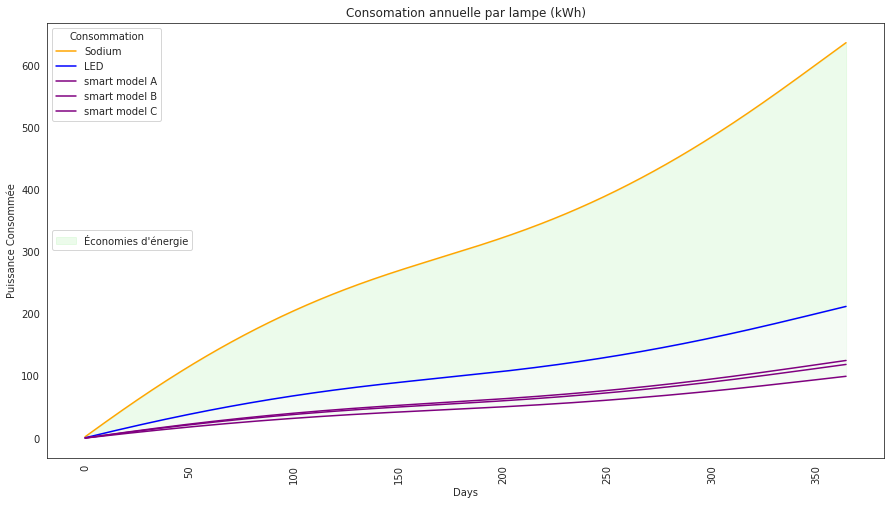

In [127]:
sns.set_style(style="white")
sns.set_palette(palette="deep")
fig, ax = plt.subplots(figsize = (15,8))
ax1 = sns.lineplot(x=conso_df.index, 
                   y = conso_df['SON_kwh'].cumsum(), 
                   color = 'orange',label = 'Sodium' )
ax2 = sns.lineplot(x=conso_df.index, 
                   y = conso_df['LED_kwh'].cumsum(),
                   color='blue',label = 'LED' )
ax3 = sns.lineplot(x=conso_df.index, 
                   y = conso_df['smart_A_LED_kwh'].cumsum(), 
                   color = 'purple', label= 'smart model A')
ax4 = sns.lineplot(x=conso_df.index, 
                   y = conso_df['smart_B_LED_kwh'].cumsum(), 
                   color = 'purple', label= 'smart model B')
ax5 = sns.lineplot(x=conso_df.index, 
                   y = conso_df['smart_C_LED_kwh'].cumsum(), 
                   color = 'purple', label= 'smart model C')

ax6 = plt.fill_between(conso_df.index,
                       conso_df['SON_kwh'].cumsum(),
                       conso_df['LED_kwh'].cumsum(),
                       color='#4ee140', 
                       alpha=0.1, label = 'Économies')

ax7 = plt.fill_between(conso_df.index,
                       conso_df['LED_kwh'].cumsum(),
                       conso_df['smart_A_LED_kwh'].cumsum(),
                       color='#9ce195', 
                       alpha=0.1, label = 'Économies')


l1 = plt.legend([ax6],["Économies d'énergie"], loc='center left')
plt.legend(title='Consommation', loc='upper left', labels=['Sodium', 'LED', 'smart model A',
                                                           'smart model B', 'smart model C'])
plt.gca().add_artist(l1)
plt.xticks(rotation=90)
ax.set_xlabel("Days")
ax.set_ylabel("Puissance Consommée")
plt.title('Consomation annuelle par lampe (kWh)');
#plt.legend()

## Area Clustering

### Clustering with density

In [142]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
import joblib

In [128]:
gpd_global_density.columns

Index(['ED_ID', 'geometry', 'art_gallery', 'atm', 'bakery', 'bank', 'bar',
       'beauty_salon', 'bus_station', 'cafe', 'car_dealer', 'car_rental',
       'car_repair', 'car_wash', 'clothing_store', 'convenience_store',
       'department_store', 'doctor', 'drugstore', 'electrician',
       'electronics_store', 'food', 'furniture_store', 'gas_station',
       'grocery_or_supermarket', 'gym', 'hair_care', 'hardware_store',
       'health', 'home_goods_store', 'hospital', 'jewelry_store', 'laundry',
       'liquor_store', 'local_government_office', 'lodging', 'movie_theater',
       'museum', 'night_club', 'park', 'parking', 'pharmacy', 'plumber',
       'police', 'post_office', 'primary_school', 'real_estate_agency',
       'restaurant', 'school', 'shopping_mall', 'spa', 'stadium', 'store',
       'supermarket', 'pop', 'light', 'sensors'],
      dtype='object')

In [130]:
## Getting the data
X = gpd_global_density.drop(columns=['ED_ID', 'geometry','light', 'sensors'])

In [133]:
## Rescaling
scaler = RobustScaler().fit(X)
X_res = scaler.transform(X)

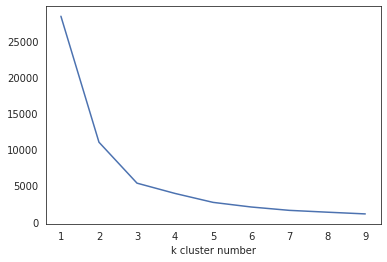

In [138]:
## Get optimal number of clusters (elbow method)
inertias = []

ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_res)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number');

In [140]:
## Model training (kmeans)
# k = 3
# model = KMeans(n_clusters=k)
# trained_kmeans_k3 = model.fit(X_res)

In [144]:
## Saving the model
# joblib.dump(trained_kmeans_k3,
#             '/home/djampa/code/data_project_lewagon/slcities/slcities/model/slcities_kmeans_k3')

['/home/djampa/code/data_project_lewagon/slcities/slcities/model/slcities_kmeans_k3']

In [146]:
## Importation of the trained model
model_slcities_kmeans_k3 = joblib.load('/home/djampa/code/data_project_lewagon/slcities/slcities/model/slcities_kmeans_k3')

In [172]:
## Data clustering
gpd_global_density['cluster'] = model_slcities_kmeans_k3.predict(X_res)

In [173]:
gpd_global_density['cluster'].value_counts()

2    263
0     50
1      9
Name: cluster, dtype: int64

In [ ]:
# lat_center, lon_center = DUBLIN_CENTER_COORDS

### Clustering with count data 

In [162]:
gpd_global_cnt.head(2)

,ED_ID,Shape__Area,geometry,art_gallery,atm,bakery,bank,bar,beauty_salon,bus_station,cafe,car_dealer,car_rental,car_repair,car_wash,clothing_store,convenience_store,department_store,doctor,drugstore,electrician,electronics_store,food,furniture_store,gas_station,grocery_or_supermarket,gym,hair_care,hardware_store,health,home_goods_store,hospital,jewelry_store,laundry,liquor_store,local_government_office,lodging,movie_theater,museum,night_club,park,parking,pharmacy,plumber,police,post_office,primary_school,real_estate_agency,restaurant,school,shopping_mall,spa,stadium,store,supermarket,pop,light,sensors,total_places
0,267070,9.623428e+05,"POLYGON ((-6.14619 53.28349, -6.14810 53.28267...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2225,0.0,0.0,0.0
1,267090,2.690560e+06,"POLYGON ((-6.18041 53.27607, -6.17807 53.27493...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445,0.0,0.0,0.0


In [241]:
## Getting the data
X_cnt = gpd_global_cnt.drop(columns=['ED_ID', 'geometry','light', 'sensors'])

In [ ]:
# ## Rescaling
# scaler = RobustScaler().fit(X_cnt)

In [226]:
## Saving the scaler
# joblib.dump(scaler,
#             '../slcities/model/slcities_scaler')

['../slcities/model/slcities_scaler']

In [242]:
scaler = joblib.load('../slcities/model/slcities_scaler')

In [243]:
X_scaled = scaler.transform(X_cnt)

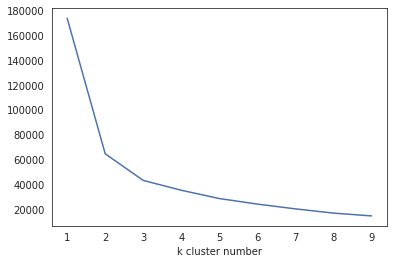

In [229]:
## Get optimal number of clusters (elbow method)
inertias = []

ks = range(1,10)
for k in ks:
    km_test = KMeans(n_clusters=k).fit(X_scaled)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number');

In [230]:
## Model training (kmeans)
# k = 4
# trained_kmeans_k4_cnt = KMeans(n_clusters=k).fit(X_scaled)

In [237]:
## Saving the model
# joblib.dump(trained_kmeans_k4_cnt,
#             '../slcities/model/trained_kmeans_k4_cnt')

['../slcities/model/trained_kmeans_k4_cnt']

In [337]:
## Importation of the trained model
k = 4
trained_kmeans_k4_cnt = joblib.load('../slcities/model/trained_kmeans_k4_cnt')

In [338]:
## Data clustering
gpd_global_cnt['cluster'] = trained_kmeans_k4_cnt.predict(X_scaled)

In [339]:
## Renaming the cluster
gpd_global_cnt['cluster'] = gpd_global_cnt['cluster'].map({0:1,
                                                           1:2,
                                                           2:4,
                                                           3:3})

In [340]:
gpd_global_cnt['cluster'].value_counts()

2    284
1     19
3     15
4      4
Name: cluster, dtype: int64

In [285]:
gpd_global_cnt.head()

,ED_ID,Shape__Area,geometry,art_gallery,atm,bakery,bank,bar,beauty_salon,bus_station,cafe,car_dealer,car_rental,car_repair,car_wash,clothing_store,convenience_store,department_store,doctor,drugstore,electrician,electronics_store,food,furniture_store,gas_station,grocery_or_supermarket,gym,hair_care,hardware_store,health,home_goods_store,hospital,jewelry_store,laundry,liquor_store,local_government_office,lodging,movie_theater,museum,night_club,park,parking,pharmacy,plumber,police,post_office,primary_school,real_estate_agency,restaurant,school,shopping_mall,spa,stadium,store,supermarket,pop,light,sensors,total_places,cluster
0,267070,9.623428e+05,"POLYGON ((-6.14619 53.28349, -6.14810 53.28267...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2225,0.0,0.0,0.0,-
1,267090,2.690560e+06,"POLYGON ((-6.18041 53.27607, -6.17807 53.27493...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445,0.0,0.0,0.0,-
2,268025,8.953063e+05,"POLYGON ((-6.22254 53.38053, -6.22286 53.37966...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2051,158.0,0.0,5.0,-
3,267158,6.936444e+07,"POLYGON ((-6.34697 53.45360, -6.34454 53.44991...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9602,0.0,0.0,2.0,--
4,267023,1.399951e+06,"POLYGON ((-6.16683 53.29051, -6.16826 53.28882...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2316,0.0,0.0,0.0,-


## Clustering maps

In [176]:
sensors.head()

,Unnamed: 0,counter locations,latitude,longitude,sensor_ID,geometry,ED_ID
0,0,Bachelors Walk,53.347200,-6.260863,ID_00,POINT (-6.260863323 53.34719979),268106
1,1,Capel Street,53.348420,-6.269180,ID_01,POINT (-6.26918 53.34842),268106
2,2,College Green - Dame St Side,53.345100,-6.258778,ID_02,POINT (-6.258778243 53.34509951),268096
3,3,College Green @ Church Lane,53.344263,-6.260774,ID_03,POINT (-6.260774367 53.3442633),268140
4,4,"College Green, Bank Of Ireland",53.345050,-6.259390,ID_04,POINT (-6.25939 53.34505),268140


In [177]:
mymap = folium.Map(location=[lat_center, lon_center],
                zoom_start=10,
                min_zoom=8,
                tiles= None,
                control_scale=True,
                attr='SL Cities Project')


dublin_layer = folium.TileLayer(tiles= 'CartoDB dark_matter',
                 control_scale = True,
                 overlay = False,
                 name = 'Dublin')




cluster_layer = folium.Choropleth(geo_data=gpd_global_density,
                                name="clusters K-means",
                                data=gpd_global_density,
                                columns=["ED_ID","cluster"],
                                key_on="feature.properties.ED_ID",
                                fill_color='Set1',
                                fill_opacity=0.4,
                                line_opacity=0.8,
                                legend_name="clusters K-means",
                                threshold_scale=k,
                                highlight=True,
)



density_layer = folium.Choropleth(geo_data = gpd_global_density,
                                name="density",
                                data=gpd_global_density,
                                columns=["ED_ID", "pop"],
                                key_on="feature.properties.ED_ID",
                                fill_color="OrRd",
                                fill_opacity=0.4,
                                line_opacity=0.8,
                                legend_name="Pop density (%)",
                                threshold_scale=8,
                                highlight=True)

sensors_marker_cluster = MarkerCluster(name='Sensors',
                                       options={'maxZoom': 20,
                                                'maxClusterRadius': 80,
                                                'disableClusteringAtZoom': 13
                                               })

# add places marker to marker cluster
for index, row in sensors.iterrows():
    folium.CircleMarker(
        radius=0.1,
        location=[row['latitude'],row['longitude']],
        color="blue",
        fill=False
    ).add_to(sensors_marker_cluster)


# marker_cluster = MarkerCluster(name='Light',
#                                options={'maxZoom':2,
#                                         'minZoom': 20,
#                                         'maxClusterRadius':80,
#                                         'disableClusteringAtZoom': 11
#                                        })

# for k in range(len(df_lights)):
#     folium.CircleMarker(location=[df_lights['latitude'][k], df_lights['longitude'][k]],
#                         radius = 0.5, 
#                         popup = "("+str('Street Light')+") ", 
#                         fill_color = 'yellow', 
#                         color = "gray",
#                         weight = 0.5,
#                         fill_opacity = 0.9
#                        ).add_to(marker_cluster)


dublin_layer.add_to(mymap)
# hm.add_to(finalmap)
density_layer.add_to(mymap)

cluster_layer.add_to(mymap)

# marker_cluster.add_to(finalmap)
sensors_marker_cluster.add_to(mymap)

folium.LayerControl().add_to(mymap);

In [178]:
# mymap

In [341]:
clustering_map = folium.Map(location=[lat_center, lon_center],
                zoom_start=10,
                min_zoom=8,
                tiles= None,
                control_scale=True,
                attr='SL Cities Project')


dublin_layer = folium.TileLayer(tiles= 'CartoDB dark_matter',
                 control_scale = True,
                 overlay = False,
                 name = 'Dublin')




cluster_layer = folium.Choropleth(geo_data=gpd_global_cnt,
                                name="clusters K-means",
                                data=gpd_global_cnt,
                                columns=["ED_ID","cluster"],
                                key_on="feature.properties.ED_ID",
                                fill_color='Set1',
                                fill_opacity=0.4,
                                line_opacity=0.8,
                                legend_name="clusters K-means",
                                threshold_scale=k,
                                highlight=True,
)



density_layer = folium.Choropleth(geo_data = gpd_global_cnt,
                                name="density",
                                data=gpd_global_cnt,
                                columns=["ED_ID", "pop"],
                                key_on="feature.properties.ED_ID",
                                fill_color="OrRd",
                                fill_opacity=0.4,
                                line_opacity=0.8,
                                legend_name="Pop density (%)",
                                threshold_scale=8,
                                highlight=True)


sensors_marker_cluster = MarkerCluster(name='Sensors',
                                       options={'maxZoom': 20,
                                                'maxClusterRadius': 80,
                                                'disableClusteringAtZoom': 13
                                               })

# add places marker to sensor marker cluster
for index, row in sensors.iterrows():
    folium.CircleMarker(
        radius=0.1,
        location=[row['latitude'],row['longitude']],
        color="blue",
        fill=False
    ).add_to(sensors_marker_cluster)

    


dublin_layer.add_to(clustering_map)
# hm.add_to(finalmap)
# density_layer.add_to(mymap2)

cluster_layer.add_to(clustering_map)

# marker_cluster.add_to(finalmap)
sensors_marker_cluster.add_to(clustering_map)


# places_cluster.add_to(clustering_map)


folium.LayerControl().add_to(clustering_map);

In [342]:
clustering_map

In [273]:
gpd_global_cnt.head(2)

,ED_ID,Shape__Area,geometry,art_gallery,atm,bakery,bank,bar,beauty_salon,bus_station,cafe,car_dealer,car_rental,car_repair,car_wash,clothing_store,convenience_store,department_store,doctor,drugstore,electrician,electronics_store,food,furniture_store,gas_station,grocery_or_supermarket,gym,hair_care,hardware_store,health,home_goods_store,hospital,jewelry_store,laundry,liquor_store,local_government_office,lodging,movie_theater,museum,night_club,park,parking,pharmacy,plumber,police,post_office,primary_school,real_estate_agency,restaurant,school,shopping_mall,spa,stadium,store,supermarket,pop,light,sensors,total_places,cluster
0,267070,9.623428e+05,"POLYGON ((-6.14619 53.28349, -6.14810 53.28267...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2225,0.0,0.0,0.0,1
1,267090,2.690560e+06,"POLYGON ((-6.18041 53.27607, -6.17807 53.27493...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445,0.0,0.0,0.0,1


## Lighting models using clustering information vs baseline

In [274]:
conso_per_year_df

night_length       1.529443e+07
SON_kwh            6.372680e+02
LED_kwh            2.124227e+02
smart_A_LED_kwh    9.983866e+01
smart_B_LED_kwh    1.253294e+02
smart_C_LED_kwh    1.189567e+02
dtype: float64

In [276]:
gpd_global_cnt.light.sum()

45017.0

In [343]:
baseline_conso_SON_pery_whole_dublin = gpd_global_cnt.light.sum() * conso_per_year_df.SON_kwh
baseline_conso_LED_pery_whole_dublin = gpd_global_cnt.light.sum() * conso_per_year_df.LED_kwh
smart_conso_pery_per_cluster_C1 = gpd_global_cnt[gpd_global_cnt.cluster==1].light.sum() * conso_per_year_df.smart_A_LED_kwh
smart_conso_pery_per_cluster_C2 = gpd_global_cnt[gpd_global_cnt.cluster==2].light.sum() * conso_per_year_df.smart_B_LED_kwh
smart_conso_pery_per_cluster_C3 = gpd_global_cnt[gpd_global_cnt.cluster==3].light.sum() * conso_per_year_df.smart_C_LED_kwh
smart_conso_pery_per_cluster_C4 = gpd_global_cnt[gpd_global_cnt.cluster==4].light.sum() * conso_per_year_df.smart_C_LED_kwh


smart_conso_pery_per_cluster = smart_conso_pery_per_cluster_C1+smart_conso_pery_per_cluster_C2+smart_conso_pery_per_cluster_C3+smart_conso_pery_per_cluster_C4

In [320]:
gpd_global_cnt[gpd_global_cnt.cluster==1].shape

(19, 60)

<AxesSubplot:>

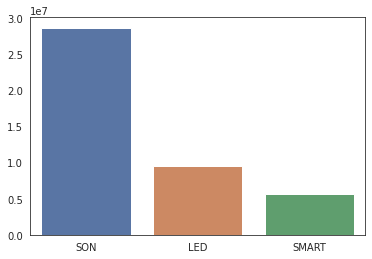

In [344]:
sns.barplot(y=[baseline_conso_SON_pery_whole_dublin, baseline_conso_LED_pery_whole_dublin, smart_conso_pery_per_cluster], x=['SON', 'LED', 'SMART'])

## economies consommation vs cost of replacement

In [345]:

## cost = light cost * life
# replacement_cost_SON_pery = cost_SON_light*(hours_per_year/life_time) # lifetime of 24 k hours. If 4000h / year-> lifetime coef = 1/6
# replacement_cost_LED_pery = cost_LED_light*(hours_per_year/life_time) # lifetime of 24 k hours. If 4000h / year-> lifetime coef = 1/6

# replacement_cost_SON_pery = 20*(4000/24000)
# replacement_cost_LED_pery = 500*(4000/100000)

In [350]:
economies_energie_per_year_SON_vs_SMART_kWh = baseline_conso_SON_pery_whole_dublin - smart_conso_pery_per_cluster
economies_energie_per_year_SON_vs_SMART_kWh

23090761.72484278

In [352]:
economies_per_year_SON_vs_SMART_euros = economies_energie_per_year_SON_vs_SMART_kWh*0.14
economies_per_year_SON_vs_SMART_euros

3232706.6414779895

In [359]:
baseline_conso_SON_pery_whole_dublin*0.14

4016305.3604391674

In [360]:
economies_per_year_SON_vs_SMART_euros/(baseline_conso_SON_pery_whole_dublin*0.14)

0.804895632020496

In [334]:
np.arange(1,31)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

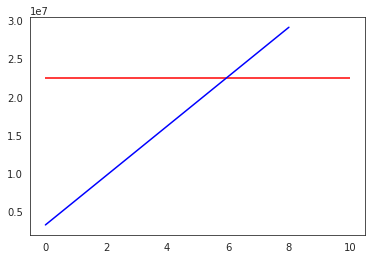

In [357]:
plt.plot(np.arange(1,10)*economies_per_year_SON_vs_SMART_euros, color='blue')
plt.hlines(gpd_global_cnt.light.sum()*500, xmin=0, xmax=10, color='red')

In [356]:
gpd_global_cnt.light.sum()*500

22508500.0

In [362]:
test.head()

,ED_ID,Shape__Area,geometry,art_gallery,atm,bakery,bank,bar,beauty_salon,bus_station,cafe,car_dealer,car_rental,car_repair,car_wash,clothing_store,convenience_store,department_store,doctor,drugstore,electrician,electronics_store,food,furniture_store,gas_station,grocery_or_supermarket,gym,hair_care,hardware_store,health,home_goods_store,hospital,jewelry_store,laundry,liquor_store,local_government_office,lodging,movie_theater,museum,night_club,park,parking,pharmacy,plumber,police,post_office,primary_school,real_estate_agency,restaurant,school,shopping_mall,spa,stadium,store,supermarket,pop,light,sensors,total_places,cluster
0,267070,9.623428e+05,"POLYGON ((-6.14619 53.28349, -6.14810 53.28267...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2225,0.0,0.0,0.0,2
1,267090,2.690560e+06,"POLYGON ((-6.18041 53.27607, -6.17807 53.27493...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1445,0.0,0.0,0.0,2
2,268025,8.953063e+05,"POLYGON ((-6.22254 53.38053, -6.22286 53.37966...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2051,158.0,0.0,5.0,2
3,267158,6.936444e+07,"POLYGON ((-6.34697 53.45360, -6.34454 53.44991...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9602,0.0,0.0,2.0,1
4,267023,1.399951e+06,"POLYGON ((-6.16683 53.29051, -6.16826 53.28882...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2316,0.0,0.0,0.0,2


In [366]:
test = gpd_global_cnt[['ED_ID', 'light', 'cluster']].copy()
test

,ED_ID,light,cluster
0,267070,0.0,2
1,267090,0.0,2
2,268025,158.0,2
3,267158,0.0,1
4,267023,0.0,2
...,...,...,...
317,268027,302.0,2
318,268051,267.0,2
319,268111,295.0,2
320,267122,0.0,2


In [388]:
test['SON_kwh'] = test['light'] * conso_per_year_df.SON_kwh
test['LED_kwh'] = test['light'] * conso_per_year_df.LED_kwh
test['Smart_kwh'] = np.nan
test.loc[test.cluster==1,'Smart_kwh'] = test[test.cluster==1]['light'] * conso_per_year_df.smart_A_LED_kwh
test.loc[test.cluster==2,'Smart_kwh'] = test[test.cluster==2]['light'] * conso_per_year_df.smart_B_LED_kwh
test.loc[test.cluster==3,'Smart_kwh'] = test[test.cluster==3]['light'] * conso_per_year_df.smart_C_LED_kwh
test.loc[test.cluster==4,'Smart_kwh'] = test[test.cluster==4]['light'] * conso_per_year_df.smart_C_LED_kwh

<AxesSubplot:>

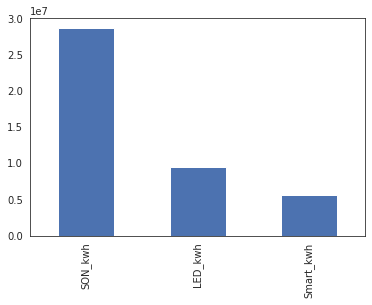

In [392]:
test[['SON_kwh', 'LED_kwh', 'Smart_kwh']].sum().plot(kind='bar')

In [410]:
total = test.groupby('cluster')[['SON_kwh', 'LED_kwh', 'Smart_kwh']].sum().reset_index()

In [411]:
total

,cluster,SON_kwh,LED_kwh,Smart_kwh
0,1,7.647217e+03,2.549072e+03,1.198064e+03
1,2,2.422893e+07,8.076310e+06,4.765023e+06
2,3,3.318255e+06,1.106085e+06,6.194075e+05
3,4,1.133063e+06,3.776875e+05,2.115050e+05


In [414]:
truc = total.melt(id_vars='cluster')
truc

,cluster,variable,value
0,1,SON_kwh,7.647217e+03
1,2,SON_kwh,2.422893e+07
2,3,SON_kwh,3.318255e+06
3,4,SON_kwh,1.133063e+06
4,1,LED_kwh,2.549072e+03
5,2,LED_kwh,8.076310e+06
6,3,LED_kwh,1.106085e+06
7,4,LED_kwh,3.776875e+05
8,1,Smart_kwh,1.198064e+03
9,2,Smart_kwh,4.765023e+06


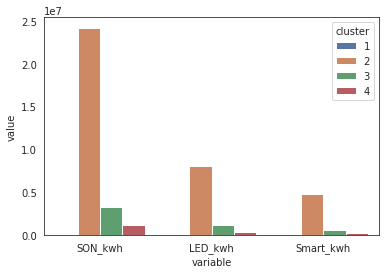

In [418]:
s = sns.barplot(x ="variable", y = 'value', data = truc, hue = "cluster")

In [ ]:
sns.barplot(x ="variable", y = 'value', data = truc, hue = "cluster")

In [ ]:
baseline_conso_SON_pery_whole_dublin = gpd_global_cnt.light.sum() * conso_per_year_df.SON_kwh
baseline_conso_LED_pery_whole_dublin = gpd_global_cnt.light.sum() * conso_per_year_df.LED_kwh
smart_conso_pery_per_cluster_C1 = gpd_global_cnt[gpd_global_cnt.cluster==1].light.sum() * conso_per_year_df.smart_A_LED_kwh
smart_conso_pery_per_cluster_C2 = gpd_global_cnt[gpd_global_cnt.cluster==2].light.sum() * conso_per_year_df.smart_B_LED_kwh
smart_conso_pery_per_cluster_C3 = gpd_global_cnt[gpd_global_cnt.cluster==3].light.sum() * conso_per_year_df.smart_C_LED_kwh
smart_conso_pery_per_cluster_C4 = gpd_global_cnt[gpd_global_cnt.cluster==4].light.sum() * conso_per_year_df.smart_C_LED_kwh


smart_conso_pery_per_cluster = smart_conso_pery_per_cluster_C1+smart_conso_pery_per_cluster_C2+smart_conso_pery_per_cluster_C3+smart_conso_pery_per_cluster_C4